In [1]:
import pandas as pd

In [2]:
import matplotlib

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.9.2


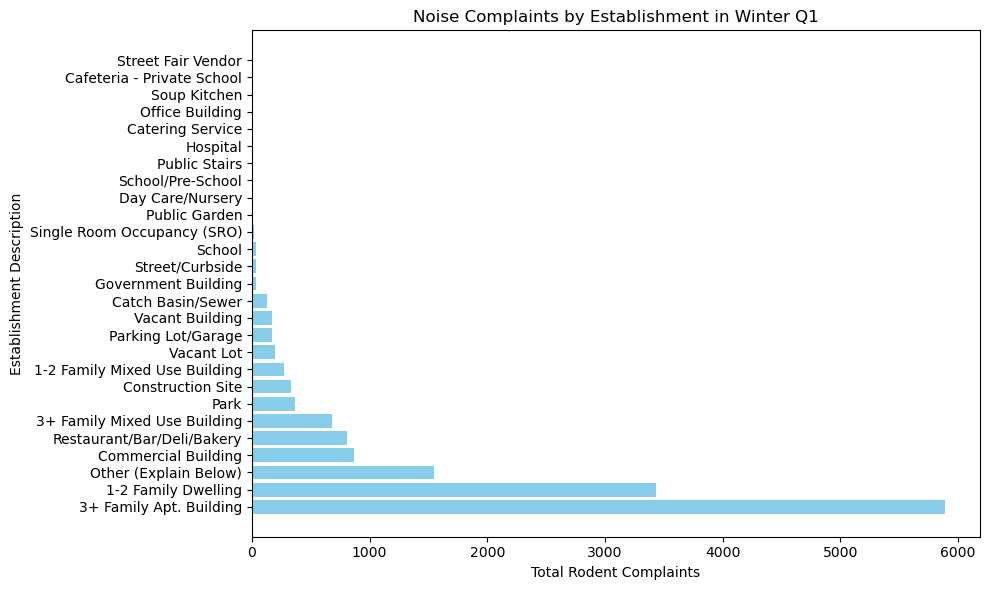

In [10]:
df = pd.read_csv('summer_rodents.csv', delimiter=',')
df_grouped = df.groupby('borough')['count'].sum().reset_index()
df_grouped = df_grouped.sort_values('count', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(df_grouped['borough'], df_grouped['count'], color='skyblue')
plt.xlabel('Total Rodent Complaints')
plt.ylabel('Establishment Description')
plt.title('Noise Complaints by Establishment in Winter Q1')
plt.tight_layout()

# Show the plot
plt.show()

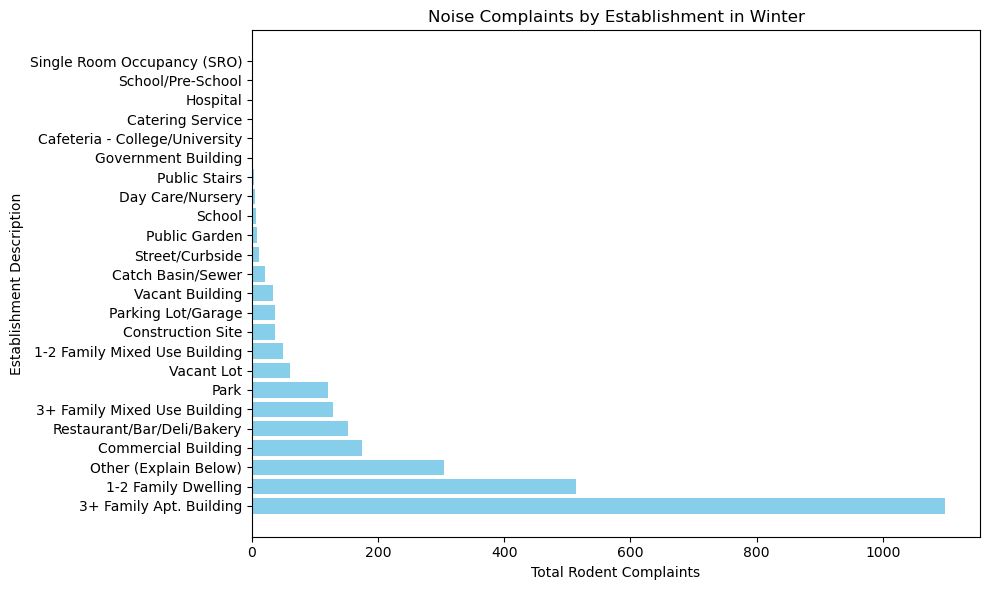

In [12]:
df = pd.read_csv('winter_rodents.csv', delimiter=',')
df_grouped = df.groupby('borough')['count'].sum().reset_index()
df_grouped = df_grouped.sort_values('count', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(df_grouped['borough'], df_grouped['count'], color='skyblue')
plt.xlabel('Total Rodent Complaints')
plt.ylabel('Establishment Description')
plt.title('Noise Complaints by Establishment in Winter')
plt.tight_layout()

# Show the plot
plt.show()

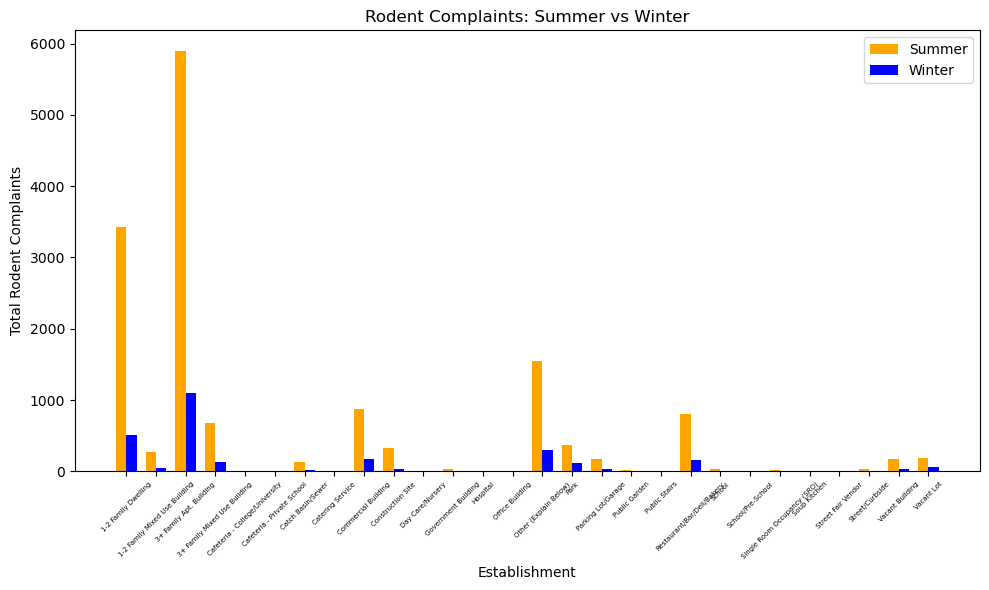

In [21]:

# Load the summer rodent data
df_summer = pd.read_csv('summer_rodents.csv', delimiter=',')

# Load the winter rodent data
df_winter = pd.read_csv('winter_rodents.csv', delimiter=',')

df_summer_grouped = df_summer.groupby('borough')['count'].sum().reset_index()
df_winter_grouped = df_winter.groupby('borough')['count'].sum().reset_index()

# Merge the two datasets on the 'borough' column, filling missing values with 0
df_combined = pd.merge(df_summer_grouped, df_winter_grouped, on='borough', how='outer', suffixes=('_summer', '_winter')).fillna(0)

# Plotting the data
plt.figure(figsize=(10, 6))

# Bar width and bar positions
bar_width = 0.35
index = range(len(df_combined))

# Plot summer rodent complaints
plt.bar(index, df_combined['count_summer'], width=bar_width, label='Summer', color='orange')

# Plot winter rodent complaints (shifted to the right for side-by-side comparison)
plt.bar([i + bar_width for i in index], df_combined['count_winter'], width=bar_width, label='Winter', color='blue')

# Adding labels and title
plt.xlabel('Establishment')
plt.ylabel('Total Rodent Complaints')
plt.title('Rodent Complaints: Summer vs Winter')
plt.xticks([i + bar_width / 2 for i in index], df_combined['borough'], rotation=45, fontsize=5)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
